# Gandezas parciais molares

## Fundamentos Teóricos

<font size =4> Uma solução é uma mistura homogênia de dois ou mais componentes. As propriedades termodinâmicas de soluções dependem da composição e da contribuição individual de cada componente as propriedaes da solução. A contribuição de cada componente pode ser descrita em termos de grandezas parciais molares. 
Por exemplo, o volume de uma solução pode ser escrita como $V = \sum_{i} n_i V_{m,i}$. Onde $n_i$ é o numero de mols do componente i e $V_{m,i}$ é o volume molar parcial de i. 

Podemos escrever qualquer propriedade termodinâmica de uma solução, como U, H, S e G, em termos de somatórios similares ao do volume:

$$ Y = \sum_{i} n_i Y_{m,i}$$
    
Onde Y se refere a prorpiedade termodinâmica da solução e $Y_{m,i}$ é a propriedade molar parcial de cada componente. Logo, determinar a propriedades molares parciais é importante para o cálculo de propriedaes de mistura, como variação do volume ou liberação/abseorção de calor ao se misturar duas substâncias puras.
    
O exemplo resolvido mostrará como o é possível calcular o volume molar parcial dos componentes de uma mistura binária pelo método da interseção. Para a resolução dos exercíos faremos uso das bibliotecas Numpy e Matplolib. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


<font size = 4>A densidade do $H_2 O$ e $CH_3 OH$ a 25ºC e 1 atm são 0,99705 e 0,78706 $g ~cm^{-3}$, respectivamente. Para soluções binárias destes compostos, os seguintes  valores de $\Delta V_{mix}/n$ vs $x_{H_2 O}$  foram medidos:

|   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|
|V   |-0,34   |-0,60   | -0,80  | -0,94  | -1,01  | -0,98  | -0,85  | -0,61  | -0,31  |
|x   |0,1   |0,2   |0,3   | 0,4  |0,5   |0,6   |0,7   |0,8   |0,9   |

\
Use o método da interseção para encontrar o volume molar parcial para a composição $x_{H_2 O} = 0,4 $

## Solução

Inicialmente os valores podem ser completados para valores de $x_{H_2 O} = 0 $  e $x_{H_2 O} = 1 $. Nos extremos os valores de $\Delta V_{mix}/n = 0$. Posteriormente é preciso armazenar os valores de $x_{H_2 O} = 0,4 $ e $\Delta V_{mix}/n$ correspondente a esta fração molar. 

A reta tangente a composição desejada é utilizada usando a equação $y - y_1 = m(x - x_1)$. Onde m é o coeficiente angular da reta, obtido pela derivada primeira na composição desejada, $y_1$ é $\Delta V_{mix}/n $ quando $x_{H_2 O} = 0,4 $. A partir da equação da reta determinamos $\Delta V_{mix}/n $ quando $x_{H_2 O} = 0 $  e $x_{H_2 O} = 1 $.
    
Quando  $x_{H_2 O} = 0 $ temos que $\Delta V_{mix}/n = V_{m,metOH} - V^* _{m,metOH}$ e quando  $x_{H_2 O} = 1$ temos que $\Delta V_{mix}/n = V_{m,H_2 O} - V^* _{m,H_2 O} $

<font>

In [3]:
x = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
V = np.array([0,-0.34,-0.6,-0.8,-0.94,-1.01,-0.98,-0.85,-0.61,-0.31,0])

x1 = 0.4 

#Encontrando o índice referente ao valor 0,4
Vi = np.where(x == x1)

#Encontrando o valor de volume que corresponde a x = 0,4
y1 = V[Vi]

# Fazendo a derivada numérica e guardando o valor referente a x = 0,4 na variável m
derivada = np.gradient(V,x)

m =  derivada[Vi]

#Definindo a equação da reta
def y(x):
    b = -m*x1 + y1
    
    return m*x + b


print('Extrapolação quando x = 1: ', y(1), 'cm³/mol')
print('Extrapolação quando x = 0: ', y(0), 'cm³/mol')


Extrapolação quando x = 1:  [-1.57] cm³/mol
Extrapolação quando x = 0:  [-0.52] cm³/mol


<font size =4> Vamos construir o gráfico contendo os dados do problema e a reta tangente para verificar se os resultados calculados estão coerentes.
<font>

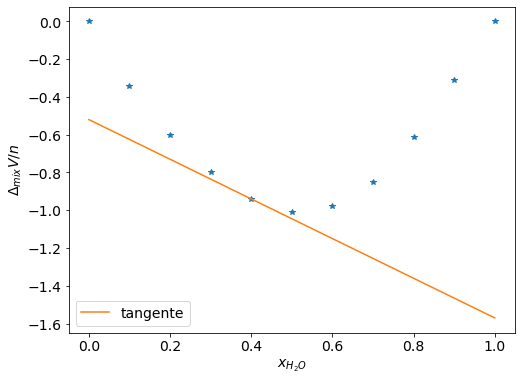

In [4]:
#Instruções para cntrole do tamanho do gráfico
plt.rcParams.update({'font.size': 14}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(8,6))


plt.plot(x, V,'*') #Dados experimentais do problema
plt.plot(x,y(x),label='tangente')#Derivada numérica calculada



plt.legend(loc='best')
plt.xlabel('$x_{H_2 O}$')
plt.ylabel('$\Delta_{mix}V/n$')

plt.show()

<font size = 4> Note que a reta tangente obtida passa pelo ponto $x_{H_2 O} = 0,4 $. De posse dos valores calculados, o próximo passo é converter os valores de densidade dos líquidos puros em  $V^* _{m,i} $.

In [5]:
Mm_a = 18 # g/mol
Mm_m = 32 # g/mol

d_a =  0.99705 # g/cm³
d_m =  0.78706 # g/cm³

#conversão da densidade em volume molar 
Va_puro = Mm_a/d_a # cm³/mol
Vm_puro = Mm_m/d_m # cm³/mol

# cálculo do volume molar parcial de cada líquido
Va = y(1) + Va_puro
Vm = y(0) + Vm_puro

print('Volume parcial da água=',Va, 'cm³/mol')
print('Volume parcial do metanol=',Vm, 'cm³/mol')

Volume parcial da água= [16.48325711] cm³/mol
Volume parcial do metanol= [40.13763728] cm³/mol


<font size = 4> Uma forma alternativa de resolver este problema é ajustando uma função aos dados fornecidos pelo problema e calculando a derivada analítica da função ajustada. A reta tangente a composição desejada, $x_1$, será obtida usando a mesma expressão anterior, mas considerando $y_1 = f(x)$. O leitor é encorajado a tentar resolver o exercício anterior desta maneira para avaliar os prós e contras das duas formas de resolução. <font>